In [19]:
from storm_analysis.daostorm_3d.mufit_analysis import analyze
import storm_analysis.sa_library.readinsight3 as readinsight3
import sys
import numpy as np
import matplotlib.pyplot as plt

In [20]:
sample_i3 = './sample_plate-Copy1.bin'

In [21]:
i3_reader = readinsight3.I3Reader(sample_i3)
frames = i3_reader.getNumberFrames()
data = i3_reader.getMoleculesInFrameRange(start = 1, stop = frames + 1)
molecules = len(data)

print(data)

('Version:', 'M425')
('Frames:', 1)
('Status:', 6)
('Molecules:', 6678)

[ ( 125.07336426,   50.03527832,  125.07336426,   50.03527832,  45.44120026,  1100.60839844,  392.67364502,   1.40129846e-45,  1.14217889,  20.9861908 ,  229.71212769, 0,    0,    1, 1, 0, -500., -500.)
 ( 174.93818665,  175.01818848,  174.93818665,  175.01818848,  77.77065277,  2180.26928711,  422.46179199,   1.40129846e-45,  0.5198462 ,  21.66465378,  344.57403564, 0,    1,    2, 2, 4, -500., -500.)
 ( 225.36109924,  225.06057739,  225.36109924,  225.06057739,  33.34045792,  2044.73022461,  624.84527588,   1.40129846e-45,  0.32380772,  23.35819244,  337.25799561, 0,    2,    2, 1, 0, -500., -500.)
 ...,
 ( 199.75743103,  225.02732849,  199.75743103,  225.02732849,  66.36131287,  2905.75292969,  527.97344971,   1.40129846e-45,  0.38472074,  21.57394981,  288.86801147, 0, 3729, 1000, 2, 0, -500., -500.)
 (  75.11397552,  124.82183075,   75.11397552,  124.82183075,  29.39095879,   900.21856689,  441.57791138,   1.4

In [22]:
xc = np.zeros(molecules)
yc = np.zeros(molecules)
zc = np.zeros(molecules)
w = np.zeros(molecules)
ratio = np.zeros(molecules)

In [23]:
for i in range(molecules):
    xc[i] = data[i][2]
    yc[i] = data[i][3]
    zc[i] = data[i][17]
    w[i] = data[i][6]
    ratio[i] = data[i][8]

In [24]:
xc

array([ 125.07336426,  174.93818665,  225.36109924, ...,  199.75743103,
         75.11397552,   99.89265442])

In [25]:
yc

array([  50.03527832,  175.01818848,  225.06057739, ...,  225.02732849,
        124.82183075,   75.13622284])

In [26]:
print(data[0])

( 125.07336426,  50.03527832,  125.07336426,  50.03527832,  45.44120026,  1100.60839844,  392.67364502,   1.40129846e-45,  1.14217889,  20.9861908,  229.71212769, 0, 0, 1, 1, 0, -500., -500.)


<IPython.core.display.Javascript object>


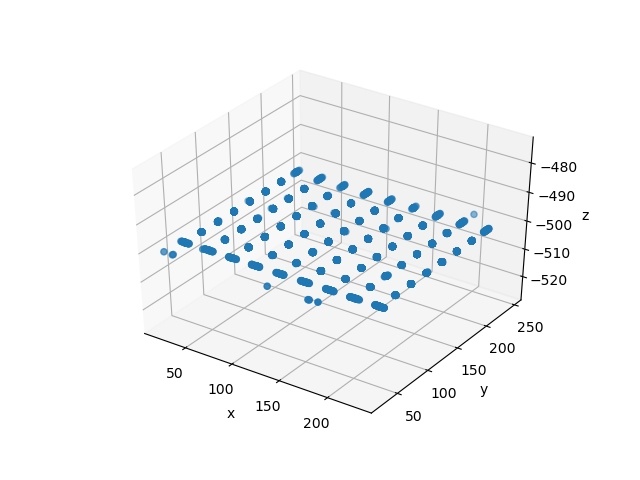

In [27]:
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.scatter(yc, xc, zc)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()